### 使用 Plotly 画图工具包，生成交互式图表
https://plotly.com/python

In [1]:
import numpy as np
import pandas as pd
import plotly
import plotly.graph_objs as go
import matplotlib.pyplot as plt

from linear_regression_gradient_descent import LinearRegression

In [2]:
data = pd.read_csv('./data/world-happiness-report-2017.csv')

train_data = data.sample(frac=0.8)
test_data = data.drop(train_data.index)

input_param_name_1 = 'Economy..GDP.per.Capita.'
input_param_name_2 = 'Freedom'
output_param_name = 'Happiness.Score'

x_train = train_data[[input_param_name_1, input_param_name_2]].values
y_train = train_data[[output_param_name]].values

x_test = test_data[[input_param_name_1, input_param_name_2]].values
y_test = test_data[[output_param_name]].values

plotly.offline.iplot()是用来在Jupyter Notebook中生成交互式图表的Plotly函数

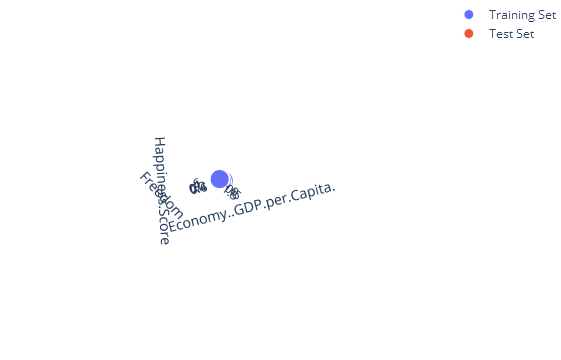

In [5]:
plot_training_trace = go.Scatter3d(
    x=x_train[:, 0].flatten(),
    y=x_train[:, 1].flatten(),
    z=y_train.flatten(),
    name='Training Set',
    mode='markers',
    marker={
        'size': 10,
        'opacity': 1,
        'line': {
            'color': 'rgb(255, 255, 255)',
            'width': 1
        },
    }
)

plot_test_trace = go.Scatter3d(
    x=x_test[:, 0].flatten(),
    y=x_test[:, 1].flatten(),
    z=y_test.flatten(),
    name='Test Set',
    mode='markers',
    marker={
        'size': 10,
        'opacity': 1,
        'line': {
            'color': 'rgb(255, 255, 255)',
            'width': 1
        },
    }
)

plot_layout = go.Layout(
    title='Date Sets',
    scene={
        'xaxis': {'title': input_param_name_1},
        'yaxis': {'title': input_param_name_2},
        'zaxis': {'title': output_param_name} 
    },
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
)

plot_data = [plot_training_trace, plot_test_trace]

plot_figure = go.Figure(data=plot_data, layout=plot_layout)

plotly.offline.iplot(plot_figure)

In [10]:
num_iterations = 500
learning_rate = 0.01
ploynomial_degree = 0
sinusoid_degree = 0

linear_regression = LinearRegression(x_train, y_train, ploynomial_degree, sinusoid_degree)
theta, cost_history = linear_regression.train(learning_rate, num_iterations)

print(theta)
print('开始的损失', cost_history[0])
print(cost_history[-1])

[[5.40016268]
 [0.7822835 ]
 [0.3660583 ]]
开始的损失 15.108331088475987
0.16473537993164747


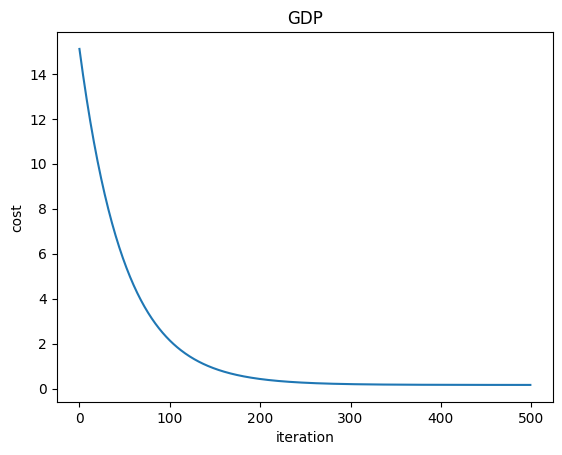

In [7]:
plt.plot(range(num_iterations), cost_history)
plt.xlabel('iteration')
plt.ylabel('cost')
plt.title('GDP')
plt.show()

#### 注：x值和y值的取值应该是不同的，所以要相互组合

x_predictions —— 得到的是一个二维数组  
x_predictions[x_y_index] —— 得到的是一个一维数组（即x_predictions中的一行）

### 问题：用自行定义的x、y生成的预测得到的结果非常不对

In [28]:
predictions_num = 10

x_min = x_train[:, 0].min()
x_max = x_train[:, 0].max()

y_min = x_train[:, 1].min()
y_max = x_train[:, 1].max()

x_axis = np.linspace(x_min, x_max, predictions_num)
y_axis = np.linspace(y_min, y_max, predictions_num)

x_predictions = np.zeros((predictions_num * predictions_num, 1))
y_predictions = np.zeros((predictions_num * predictions_num, 1))

x_y_index = 0
for x_index, x_value in enumerate(x_axis):
    for y_index, y_value in enumerate(y_axis):
        x_predictions[x_y_index] = x_value
        y_predictions[x_y_index] = y_value
        x_y_index += 1

z_predictions = linear_regression.predict(np.hstack((x_predictions, y_predictions)))

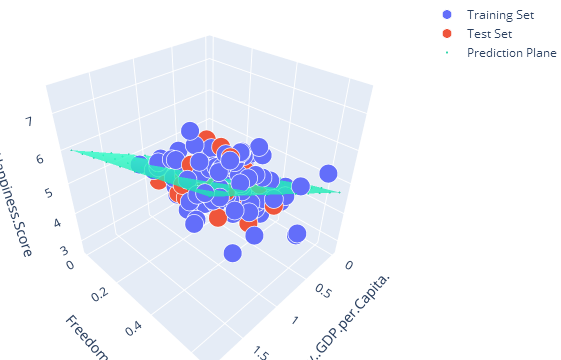

In [29]:
plot_predictions_trace = go.Scatter3d(
    x=x_predictions.flatten(),
    y=y_predictions.flatten(),
    z=z_predictions.flatten(),
    name='Prediction Plane',
    mode='markers',
    marker={
        'size': 1,
    },
    opacity=0.8,
    surfaceaxis=2, 
)

plot_data = [plot_training_trace, plot_test_trace, plot_predictions_trace]
plot_figure = go.Figure(data=plot_data, layout=plot_layout)
plotly.offline.iplot(plot_figure)